<a href="https://colab.research.google.com/github/amanda206/Desafio-Alura-Store/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [6]:
tiendas = [tienda, tienda2, tienda3, tienda4]
nombres = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

In [7]:
for nombre, df in zip(nombres, tiendas):
    ingreso_total = df['Precio'].sum()
    print(f"{nombre}: ${ingreso_total}")

Tienda 1: $1150880400.0
Tienda 2: $1116343500.0
Tienda 3: $1098019600.0
Tienda 4: $1038375700.0


# 2. Ventas por categoría

In [33]:
ventas = pd.concat([tienda, tienda2, tienda3, tienda4], ignore_index=True)

In [47]:
ingresos_por_tienda = ventas.groupby('Tienda')['Precio'].sum().reset_index(name='Ingreso Total')


In [ ]:
productos_por_categoria = (
    ventas.groupby(['Tienda', 'Categoría del Producto'])
    .size()
    .reset_index(name='Cantidad Vendida')
)

In [28]:
productos_ordenados = productos_por_categoria.sort_values(
    ['Tienda', 'Cantidad Vendida'],
    ascending=[True, False]
)

In [30]:
categorias_populares = productos_ordenados.groupby('Tienda').head(1)

In [32]:
print("Cantidad de ventas por categoría y tienda:")
print(productos_por_categoria)
print("Categoría más popular por tienda:")
print(categorias_populares)

Cantidad de ventas por categoría y tienda:
      Tienda   Categoría del Producto  Cantidad Vendida
0   Tienda 1  Artículos para el hogar               171
1   Tienda 1     Deportes y diversión               284
2   Tienda 1        Electrodomésticos               312
3   Tienda 1             Electrónicos               448
4   Tienda 1   Instrumentos musicales               182
5   Tienda 1                 Juguetes               324
6   Tienda 1                   Libros               173
7   Tienda 1                  Muebles               465
8   Tienda 2  Artículos para el hogar               181
9   Tienda 2     Deportes y diversión               275
10  Tienda 2        Electrodomésticos               305
11  Tienda 2             Electrónicos               422
12  Tienda 2   Instrumentos musicales               224
13  Tienda 2                 Juguetes               313
14  Tienda 2                   Libros               197
15  Tienda 2                  Muebles               442
16  T

# 3. Calificación promedio de la tienda


In [36]:
calificacion_promedio = (
    ventas.groupby('Tienda')['Calificación']
    .mean()
    .reset_index(name='Calificación Promedio')
)
print("Calificación promedio por tienda:")
print(calificacion_promedio)

Calificación promedio por tienda:
     Tienda  Calificación Promedio
0  Tienda 1               3.976685
1  Tienda 2               4.037304
2  Tienda 3               4.048326
3  Tienda 4               3.995759


# 4. Productos más y menos vendidos

In [37]:
ventas_por_producto = (
    ventas.groupby(['Tienda', 'Producto'])
    .size()
    .reset_index(name='Cantidad Vendida')
)

In [38]:
ventas_ordenadas = ventas_por_producto.sort_values(
    ['Tienda', 'Cantidad Vendida'],
    ascending=[True, False]
)

In [41]:
mas_vendidos = ventas_ordenadas.groupby('Tienda').head(1)
print("Productos más vendidos por tienda:")
print(mas_vendidos)

Productos más vendidos por tienda:
       Tienda                   Producto  Cantidad Vendida
1    Tienda 1                    Armario                60
75   Tienda 2  Iniciando en programación                65
129  Tienda 3              Kit de bancas                57
163  Tienda 4                   Cama box                62


In [42]:
menos_vendidos = ventas_ordenadas.groupby('Tienda').tail(1)
print("Productos menos vendidos por tienda:")
print(menos_vendidos)

Productos menos vendidos por tienda:
       Tienda                 Producto  Cantidad Vendida
13   Tienda 1             Celular ABXY                33
77   Tienda 2            Juego de mesa                32
111  Tienda 3  Bloques de construcción                35
175  Tienda 4       Guitarra eléctrica                33


# 5. Envío promedio por tienda

In [43]:
costo_envio_promedio = (
    ventas.groupby('Tienda')['Costo de envío']
    .mean()
    .reset_index(name='Costo de Envío Promedio')
)

In [45]:
costo_envio_promedio['Costo de Envío Promedio'] = costo_envio_promedio['Costo de Envío Promedio'].round(2)
print("📦 Costo de envío promedio por tienda:")
print(costo_envio_promedio)

📦 Costo de envío promedio por tienda:
     Tienda  Costo de Envío Promedio
0  Tienda 1                 26018.61
1  Tienda 2                 25216.24
2  Tienda 3                 24805.68
3  Tienda 4                 23459.46


#Graficando nuestros resultados

##Grafico lineal con ingresos por tienda

In [46]:
import matplotlib.pyplot as plt

In [48]:
tiendas = ingresos_por_tienda['Tienda']
ingresos = ingresos_por_tienda['Ingreso Total']

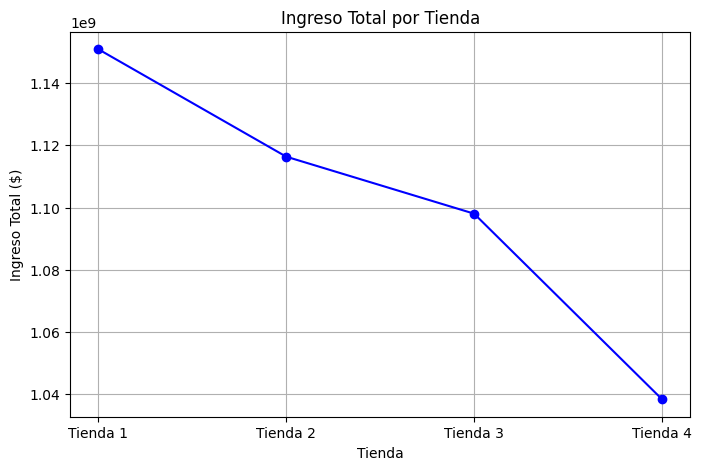

In [49]:
plt.figure(figsize=(8,5))
plt.plot(tiendas, ingresos, marker='o', linestyle='-', color='b')
plt.title('Ingreso Total por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Ingreso Total ($)')
plt.grid(True)

##Grafico de barras con valores promedio de costo de envio por **tienda**

In [68]:
colores = ['#4B0082', '#8B008B', '#9932CC', '#E6E6FA']

In [55]:
intervalo = 10000

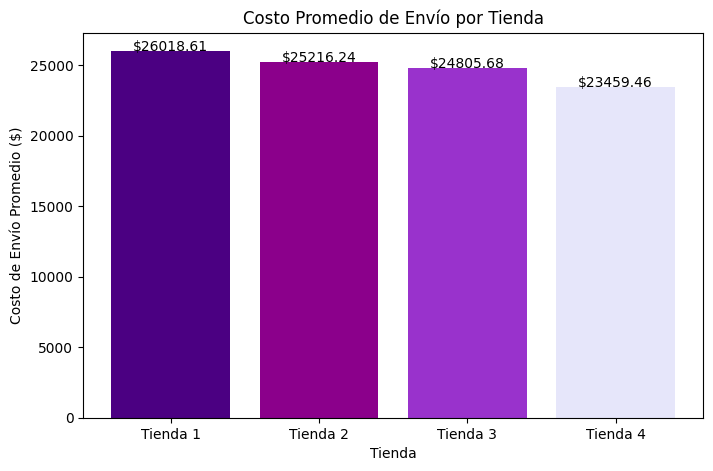

In [69]:
plt.figure(figsize=(8,5))
plt.bar(tiendas, costo_envio_promedio['Costo de Envío Promedio'], color=colores)
plt.title('Costo Promedio de Envío por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Costo de Envío Promedio ($)')

for i, valor in enumerate(costo_envio_promedio['Costo de Envío Promedio']):
    plt.text(i, valor + 0.5, f"${valor:.2f}", ha='center')

plt.show()


##Grafico circular con los productos mas vendidos

In [72]:
calificacion_promedio = ventas.groupby('Tienda')['Calificación'].mean().reset_index(name='Calificación Promedio')

In [73]:
tiendas = calificacion_promedio['Tienda']
calificaciones = calificacion_promedio['Calificación Promedio']

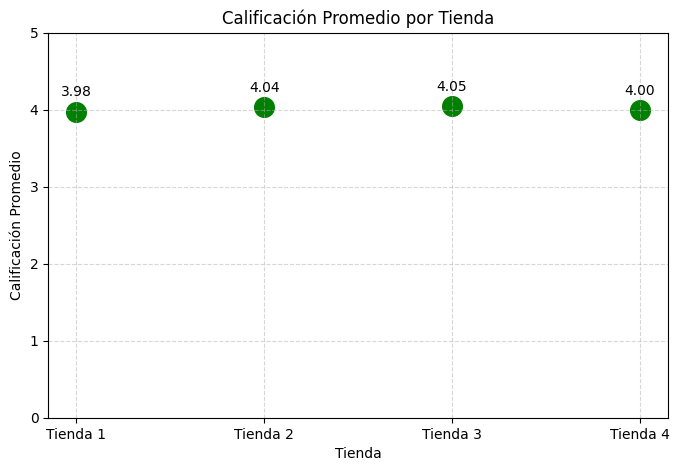

In [76]:
plt.figure(figsize=(8,5))
plt.scatter(tiendas, calificaciones, s=200, color='green')

plt.title('Calificación Promedio por Tienda')
plt.xlabel('Tienda')
plt.ylabel('Calificación Promedio')
plt.ylim(0,5)


for i, valor in enumerate(calificaciones):
    plt.text(i, valor + 0.20, f"{valor:.2f}", ha='center')

plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#***Conclusion***

En base al analisi realizado a las 4 tiendas , y considerando que en lo respectivo a ventas todas se encuentran en un rango bastante similar de ingresos, mi consejo es tomar en consideracion la opinion de los clientes y los costos de envio. Mi consejo es seleccionar la tienda numero 3, ya que si bien tiene el tercer lugar en el rango de ingresos por tienda, si tiene el primer lugar en evaluacion de clientes y el segundo costo de envio mas economico dentro de las opciones estudiadas. Esto significa que es valorado por los clientes , posee envios accesibles y tiene buen rendimiento en ventas por categoria y producto. La tienda menos eficiente, y por lo tanto, con la cual recomendaria no trabajar es la Tienda 4.